# Role of Targeted Therapy after Surgical Resection of Colorectal Liver

Metastases

JM HAN (KIRAMS)  
Ui Sep Shin [](https://orcid.org/0000-0002-1714-7469) (KIRAMS)

In [ ]:
source_directory<-"source"
source_filename<-"my_functions.R"

project_path <<- getwd()
source_path <<- file.path(project_path, source_directory)
source_path_filename <- file.path(source_path, source_filename)
source(source_path_filename)

# source_filename<-"mycphwt.R"
# source_path_filename <- file.path(source_path, source_filename)
# source(source_path_filename)

rm(source_directory, source_filename, project_path, source_path, source_path_filename)

In [ ]:
library(readxl)

raw_data_directory<-"raw_data"
raw_data_filename<-"deidentified_han20230213.xlsx"

project_path <<- getwd()
raw_data_path <<- file.path(project_path, raw_data_directory)
raw_data_path_filename <- file.path(raw_data_path, raw_data_filename)
raw_data <- read_excel(raw_data_path_filename)

rm(raw_data_directory, raw_data_filename, project_path, raw_data_path, raw_data_path_filename)

# 교육적 목적으로 원본 데이터를 inital_raw_data에 복사해 두고 필요시 비교합니다.
initial_raw_data<-raw_data

In [ ]:
# results='hide'옵션은 코드와 그 실행결과가 문서에서는 표시되지 않도록 숨깁니다.

# raw_data의 컬럼(=variable)들 중에서 결측치(=NA)가 cut-off 값 (아래에서는 5%) 이상이면 컬럼을 삭제함
# 문서에는 포함되지 않지만 아래의 라인을 실행하면 어떤 컬럼이 NA가 기준치 이상이라서 삭제되었는지 실행결과를 출력함.

cleaned_data<-my_eliminate_NA_columns(raw_data, 5)

In [ ]:
# 예시를 위해 만든 코드입니다. 실제로는 실행되지 않습니다.
cleaned_data <- my_eliminate_NA_rows(cleaned_data)
raw_data <- cleaned_data

In [ ]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

In [ ]:
selected_data <- subset(raw_data, Adjuvant_Doublet==1)
HAN<-selected_data

In [ ]:
library(survival)
library(maxstat)

HAN$TS_DFS=Surv(HAN$FU_DFS, HAN$RECUR=="1") #time object
HAN$LNR<-HAN$pN/HAN$tN
maxstat.test(TS_DFS~ preHR_CEA, data=HAN,smethod="LogRank",pmethod="condMC",B=999)
maxstat.test(TS_DFS~ CCI, data=HAN,smethod="LogRank",pmethod="condMC",B=999)
maxstat.test(TS_DFS~ ASA, data=HAN,smethod="LogRank",pmethod="condMC",B=999)
maxstat.test(TS_DFS~ NUM_HM, data=HAN,smethod="LogRank",pmethod="condMC",B=999)
maxstat.test(TS_DFS~ HM_SIZE, data=HAN,smethod="LogRank",pmethod="condMC",B=999)
maxstat.test(TS_DFS~ LNR, data=HAN,smethod="LogRank",pmethod="condMC",B=999)

HAN$CCI7<-ifelse(HAN$CCI>7,"CCI>7","CCI<7")

DFS<-survfit(Surv(FU_DFS, RECUR=="1")~Adju_TA, data=HAN)
summary(DFS)
DFS

HAN$PD<-ifelse(HAN$Diff=="PD",1,0)
HAN$Pni1<-ifelse(HAN$N=="Y",1,0)
HAN$Vi1<-ifelse(HAN$V=="Y",1,0)
HAN$Lvi1<-ifelse(HAN$L=="Y",1,0)
HAN$Male<-ifelse(HAN$SEX==1,1,0)
HAN$RTCOL<-ifelse(HAN$SIDENESS=="Rt",1,0)
HAN$CCI7<-ifelse(HAN$CCI>7,1,0)
HAN$AGE60<-ifelse(HAN$AGE>60,1,0)
HAN$CEA73<-ifelse(HAN$preHR_CEA>73,1,0)
HAN$ASA3<-ifelse(HAN$ASA>2,1,0)
HAN$Adju_target<-ifelse(HAN$Post_HR_target_all=="None",0,ifelse(HAN$Post_HR_target_all=="Avastin",1,2))
HAN$Adju_target <-as.factor(HAN$Adju_target)

In [ ]:
library(moonBook)

table1<-mytable(Adju_TA~AGE+Male+Synch_M1+M1_12m+ASA3+CCI7+RTCOL+LNR+pT4+Pni1+Lvi1+Vi1+PD+BILOBE+MULTI4+SIZE4+preHR_CEA+CEA73+PreHR_chemo+PreHR_TA+Post_HR_target_all,
                show.total=TRUE, exact=TRUE, data=HAN, method = 3)

number_of_patients_included <- nrow(HAN)
number_of_Adju_TA_no<-nrow(subset(HAN, Adju_TA==0))
number_of_Adju_TA_yes<-nrow(subset(HAN, Adju_TA==1))

In [ ]:
PFS_TA<-plot(DFS, main="Progression free survival, Target agent, yes/no", xlab="Time", ylab="Survival Probability", col=c("blue", "red"), lty=c(1,2))
 legend("topright", legend=c("No","Yes"), col=c("blue", "red"), lty=c(1,2), cex=0.8)

In [ ]:
HAN$TS_DFS=Surv(HAN$FU_DFS, HAN$RECUR=="1") #time object
fit_DFS <-survfit(HAN$TS_DFS~Adju_TA, data=HAN)

In [ ]:
out_u=mycph(TS_DFS~Adju_TA+Any_TA+Adju_target+SEX+AGE60+CCI7+RTCOL+LNR+pT4+Pni1+Lvi1+Vi1+PD+BILOBE+MULTI4+SIZE4+CEA73+M1_12m+PreHR_chemo+PreHR_TA, data=HAN) # Univariate
out_u

In [ ]:
out_m<-coxph(TS_DFS~Any_TA+SEX+AGE60+Vi1+BILOBE+MULTI4+CEA73, data=HAN)

extractHR(out_m)
DFS_step<-step(out_m, direction="backward")
Cox_step_dfs<-extractHR(DFS_step)
Cox_step_dfs
write.csv(Cox_step_dfs, file="Cox_step_DFS.csv")
length(HAN$FU_OS)
length(HAN$DEATH)

HAN$TS_OS=Surv(HAN$FU_OS, HAN$DEATH==1) #time object
fit_OS <-survfit(HAN$TS_OS~Adju_TA, data=HAN)

out_u_os=mycph(TS_OS~Adju_TA+SEX+AGE60+CCI7+RTCOL++LNR+pT4+Pni1+Lvi1+Vi1+PD, data=HAN) # Univariate
out_u_os

In [ ]:
out_m_os<-coxph(TS_OS~Adju_TA+SEX+AGE60+CCI7+RTCOL++LNR+pT4+Pni1+Lvi1+Vi1+PD, data=HAN)

extractHR(out_m_os)

Loading required package: ggplot2

Loading required package: ggpubr


Attaching package: 'survminer'

The following object is masked from 'package:survival':

    myeloma

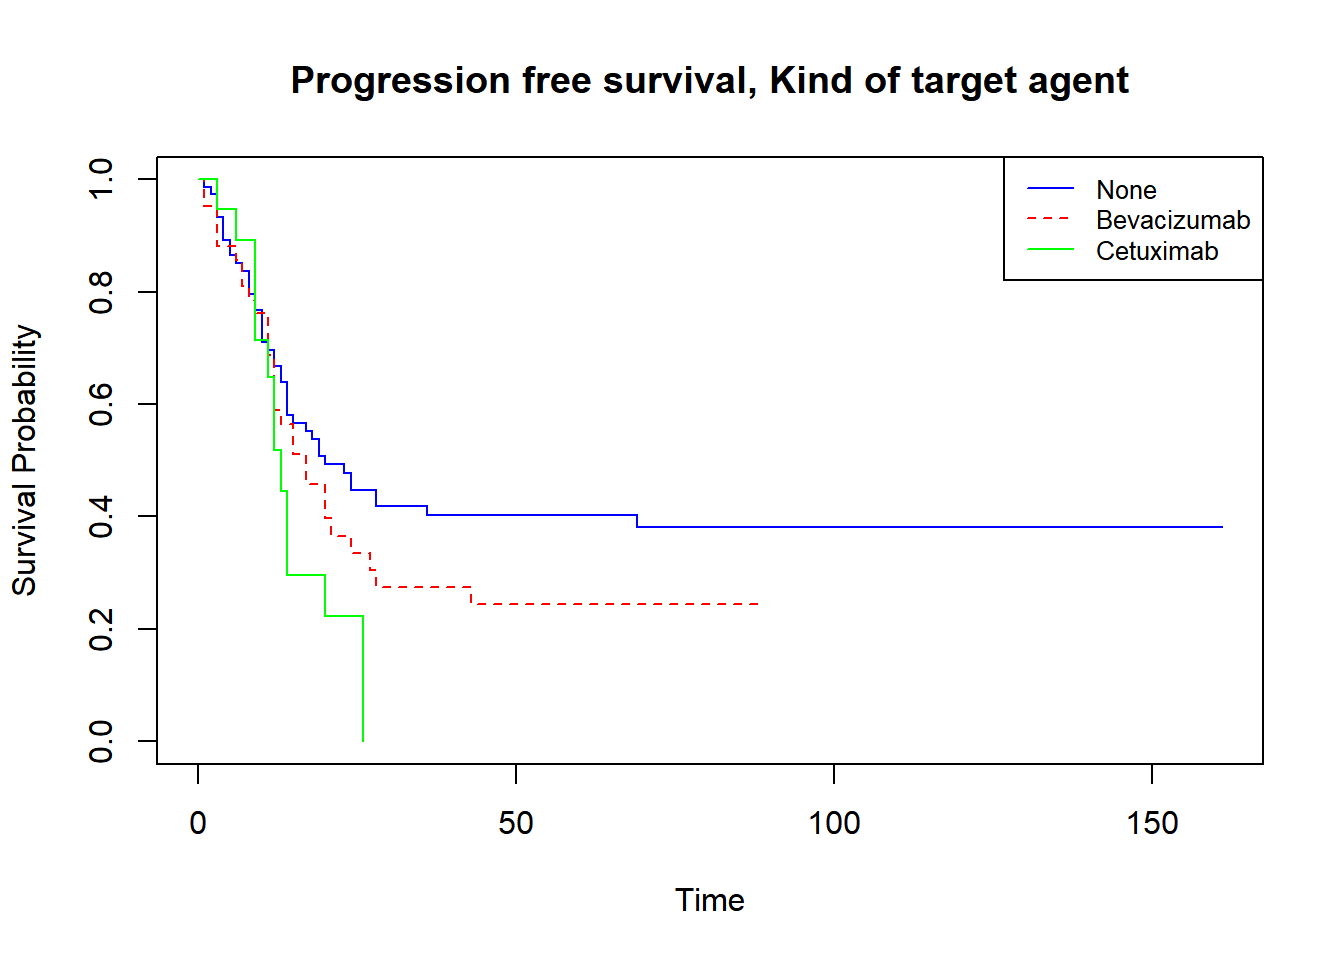

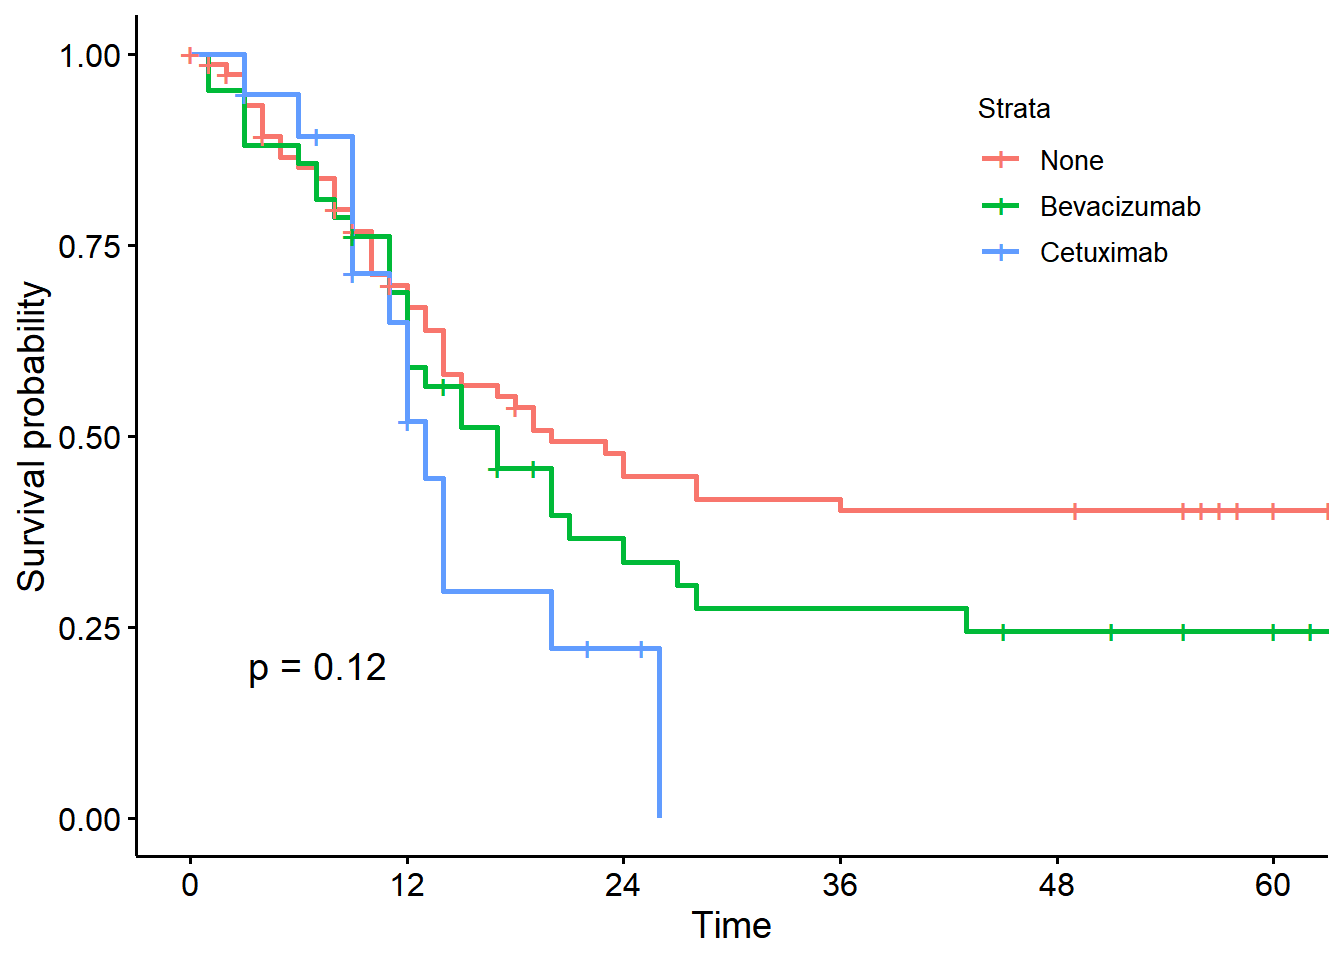

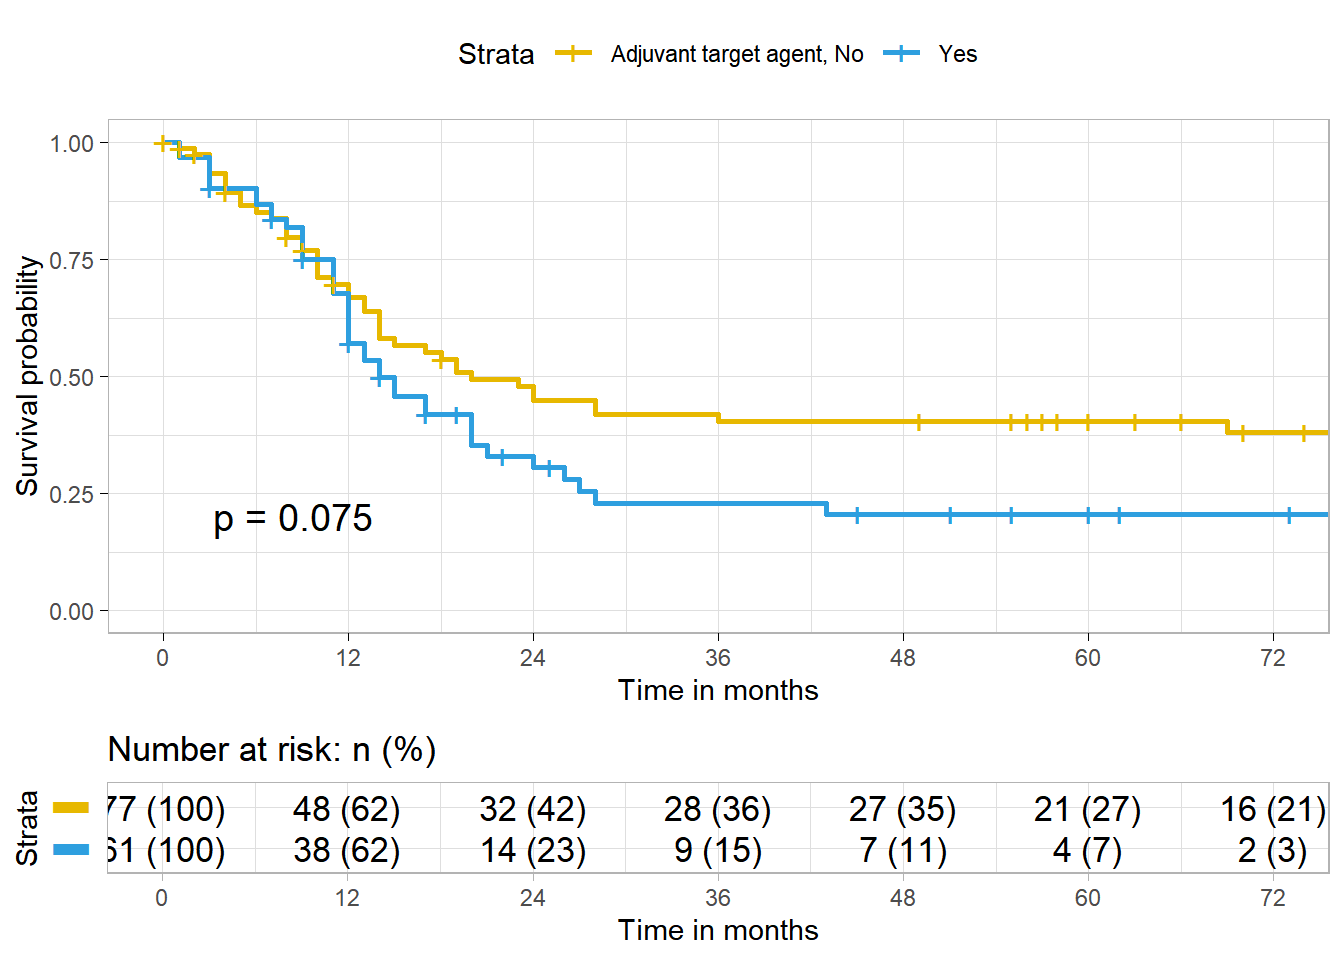

In [ ]:
library(survminer)

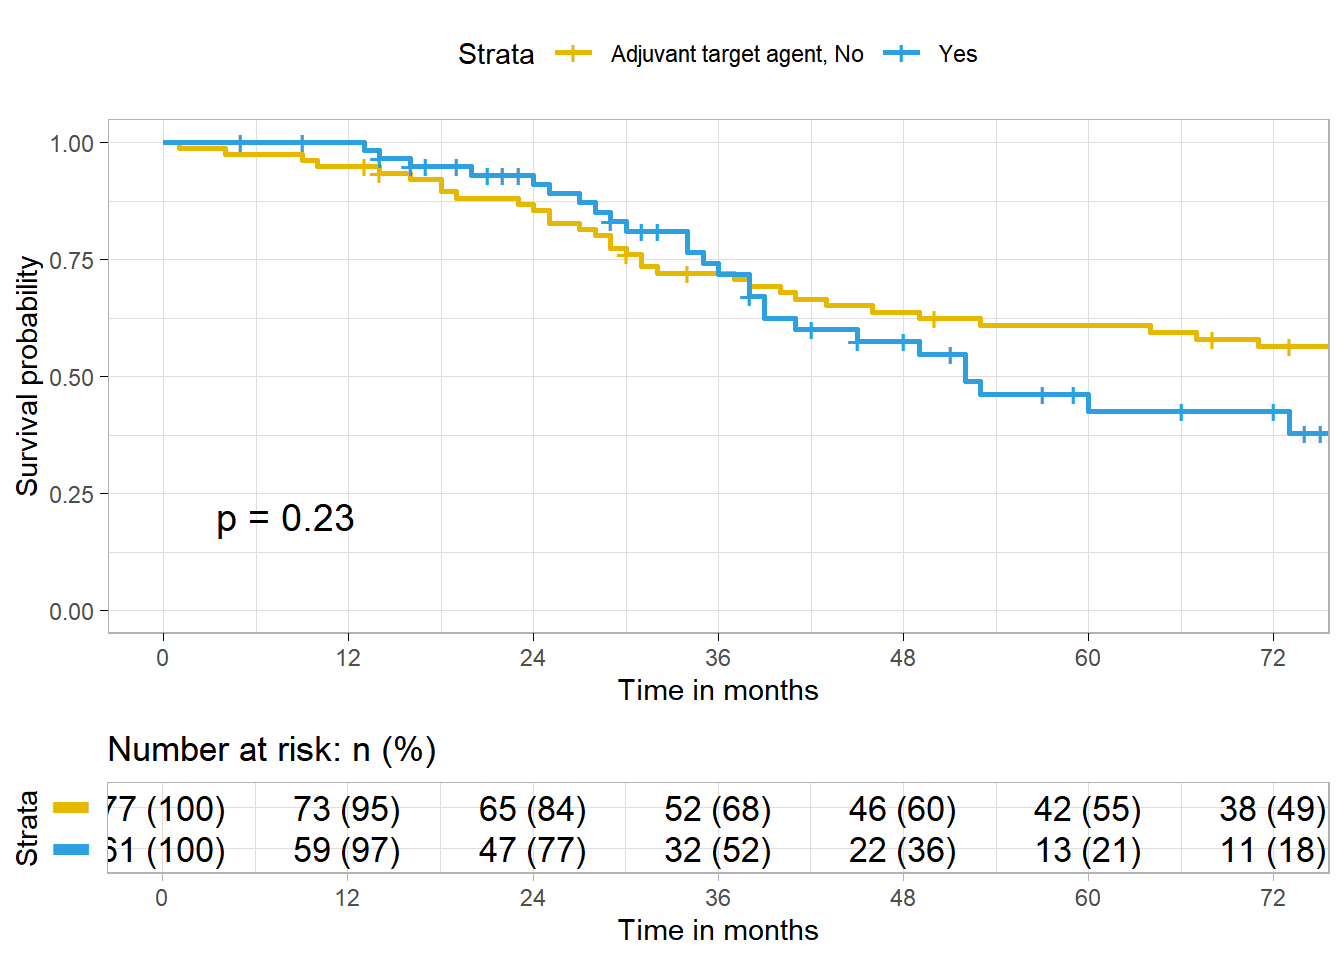

In [ ]:
OS<-survfit(Surv(FU_OS, DEATH=="1")~Adju_TA, data=HAN)
OS_all<-survfit(Surv(FU_OS, DEATH=="1")~1, data=HAN)
summary(OS_all)
OS

ggsurvplot(
  OS,                     # survfit object with calculated statistics.
  pval = TRUE,             # show p-value of log-rank test.
  conf.int = FALSE,        # show confidence intervals for 
  # point estimaes of survival curves.
  conf.int.style = "step",  # customize style of confidence intervals
  xlab = "Time in months",   # customize X axis label.
  break.time.by = 12,     # break X axis in time intervals by 200.
  ggtheme = theme_light(), # customize plot and risk table with a theme.
  risk.table = "abs_pct",  # absolute number and percentage at risk.
  risk.table.y.text.col = T,# colour risk table text annotations.
  risk.table.y.text = FALSE,# show bars instead of names in text annotations
  # in legend of risk table.
  ncensor.plot = FALSE,      # plot the number of censored subjects at time t
  #surv.median.line = "hv",  # add the median survival pointer.
  legend.labs = 
    c("Adjuvant target agent, No", "Yes"),    # change legend labels.
  palette = 
    c("#E7B800", "#2E9FDF"), # custom color palettes.
  fun = NULL, #Cumulative risk
  xlim = c(0, 72)
)

In [ ]:
library(dplyr)
library(MatchIt)

HAN_IPTW<-as.data.frame(HAN[,c("MRN","Adju_TA","Adju_target","Male","AGE60","CCI7","ASA3","RTCOL","LNR","pT4","Pni1","Lvi1","Vi1","PD","BILOBE","MULTI4","SIZE4"
                               ,"CEA73","M1_12m","PreHR_chemo","PreHR_TA","FU_DFS","RECUR")])


## DATA character change ###
HAN_IPTW$Male <-as.factor(HAN_IPTW$Male)
HAN_IPTW$AGE60 <-as.factor(HAN_IPTW$AGE60)
HAN_IPTW$CCI7 <-as.factor(HAN_IPTW$CCI7)
HAN_IPTW$ASA3 <-as.factor(HAN_IPTW$CCI7)
HAN_IPTW$RTCOL <-as.factor(HAN_IPTW$RTCOL)
HAN_IPTW$pT4 <-as.factor(HAN_IPTW$pT4)
HAN_IPTW$Pni1 <-as.factor(HAN_IPTW$Pni1)
HAN_IPTW$Lvi1 <-as.factor(HAN_IPTW$Lvi1)
HAN_IPTW$Vi1 <-as.factor(HAN_IPTW$Vi1)
HAN_IPTW$PD <-as.factor(HAN_IPTW$PD)
HAN_IPTW$BILOBE <-as.factor(HAN_IPTW$BILOBE)
HAN_IPTW$MULTI4 <-as.factor(HAN_IPTW$MULTI4)
HAN_IPTW$SIZE4 <-as.factor(HAN_IPTW$SIZE4)
HAN_IPTW$CEA73 <-as.factor(HAN_IPTW$CEA73)
HAN_IPTW$M1_12m <-as.factor(HAN_IPTW$M1_12m)
HAN_IPTW$PreHR_TA <-as.factor(HAN_IPTW$PreHR_TA)



table1_iptw <- mytable(Adju_TA~Adju_target+Male+AGE60+CCI7+ASA3+RTCOL+LNR+pT4+Pni1+Lvi1+Vi1+PD+BILOBE+MULTI4+SIZE4+CEA73+M1_12m+PreHR_TA,
                       show.total=TRUE, exact=TRUE, data=HAN_IPTW, method = 3)

table1_iptw

In [ ]:
## Calculating propensity score ###

fit_IPTW<-glm(Adju_TA~Male+AGE60+ASA3+RTCOL+LNR+pT4+Pni1+Lvi1+Vi1+PD+BILOBE+MULTI4+SIZE4+CEA73+M1_12m+PreHR_TA, family=binomial, data=HAN_IPTW)
factor<-extractOR(fit_IPTW, digits=3)
factor

                OR   lcl     ucl      p
(Intercept)  1.797 0.379   8.513 0.4602
Male1        0.892 0.347   2.288 0.8114
AGE601       0.796 0.105   6.061 0.8259
ASA31        1.176 0.149   9.296 0.8779
RTCOL1       1.777 0.590   5.350 0.3064
LNR          3.406 0.308  37.646 0.3174
pT41         0.470 0.129   1.713 0.2524
Pni11        1.324 0.515   3.399 0.5601
Lvi11        0.525 0.194   1.424 0.2059
Vi11         1.712 0.641   4.569 0.2832
PD1          0.932 0.119   7.292 0.9462
BILOBE1      0.346 0.112   1.073 0.0661
MULTI41      4.075 1.089  15.249 0.0370
SIZE41       1.388 0.450   4.281 0.5682
CEA731       1.443 0.365   5.707 0.6014
M1_12mM1     0.188 0.053   0.659 0.0091
PreHR_TA1   24.975 4.641 134.397 0.0002


Call:
glm(formula = Adju_TA ~ Male + AGE60 + ASA3 + RTCOL + LNR + pT4 + 
    Pni1 + Lvi1 + Vi1 + PD + BILOBE + MULTI4 + SIZE4 + CEA73 + 
    M1_12m + PreHR_TA, family = binomial, data = HAN_IPTW)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.58611    0.79363   0.739 0.460198    
Male1       -0.11478    0.48094  -0.239 0.811373    
AGE601      -0.22772    1.03555  -0.220 0.825948    
ASA31        0.16211    1.05487   0.154 0.877865    
RTCOL1       0.57511    0.56224   1.023 0.306364    
LNR          1.22567    1.22582   1.000 0.317372    
pT41        -0.75539    0.66004  -1.144 0.252427    
Pni11        0.28041    0.48122   0.583 0.560094    
Lvi11       -0.64350    0.50872  -1.265 0.205893    
Vi11         0.53757    0.50090   1.073 0.283185    
PD1         -0.07083    1.04981  -0.067 0.946208    
BILOBE1     -1.06017    0.57683  -1.838 0.066075 .  
MULTI41      1.40478    0.67336   2.086 0.036958 *  
SIZE41       0.32797    0.57464   0.571 0.5681

ResourceSelection 0.3-6      2023-06-27


    Hosmer and Lemeshow goodness of fit (GOF) test

data:  HAN_IPTW$Adju_TA, fitted(fit_IPTW)
X-squared = 7.4342, df = 8, p-value = 0.4906

Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var

Loading required package: Epi

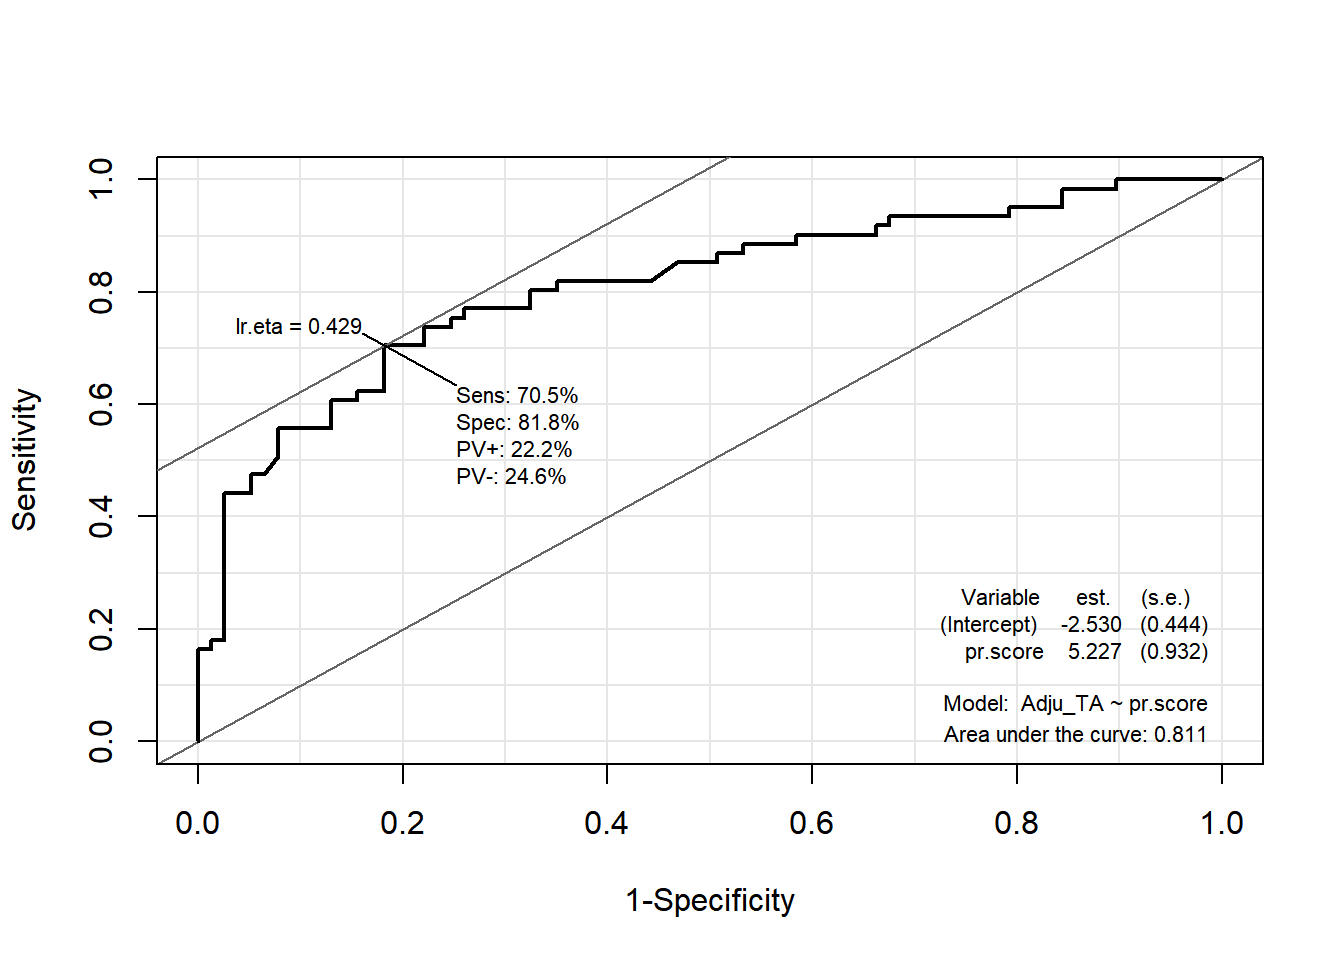

In [ ]:
library(pROC)

In [ ]:
## Weightit packages ###
#install.packages("WeightIt")
library (WeightIt)
library(cobalt)

 cobalt (Version 4.5.5, Build Date: 2024-04-02)


Attaching package: 'cobalt'

The following object is masked from 'package:MatchIt':

    lalonde

Balance Measures
               Type Diff.Un Diff.Adj    M.Threshold
prop.score Distance  1.3000  -0.0544 Balanced, <0.2
Male         Binary -0.0563  -0.0099 Balanced, <0.2
AGE60        Binary  0.0226   0.0634 Balanced, <0.2
ASA3         Binary  0.0102   0.0667 Balanced, <0.2
RTCOL        Binary -0.0473   0.0213 Balanced, <0.2
LNR         Contin. -0.0224   0.0065 Balanced, <0.2
pT4          Binary -0.2646   0.0494 Balanced, <0.2
Pni1         Binary -0.1208  -0.0207 Balanced, <0.2
Lvi1         Binary -0.4092   0.0271 Balanced, <0.2
Vi1          Binary -0.1188   0.0829 Balanced, <0.2
PD           Binary  0.0498  -0.0142 Balanced, <0.2
BILOBE       Binary -0.1557   0.1381 Balanced, <0.2
MULTI4       Binary  0.2641   0.1087 Balanced, <0.2
SIZE4        Binary  0.1845  -0.0309 Balanced, <0.2
CEA73        Binary  0.1754   0.0711 Balanced, <0.2
M1_12m_M1    Binary -0.4233  -0.1027 Balanced, <0.2
PreHR_TA     Binary  0.8984  -0.1044 Balanced, <0.2

Balance tally for mean differences
           

Use the `stars` argument to distinguish between them and appropriately label the x-axis.

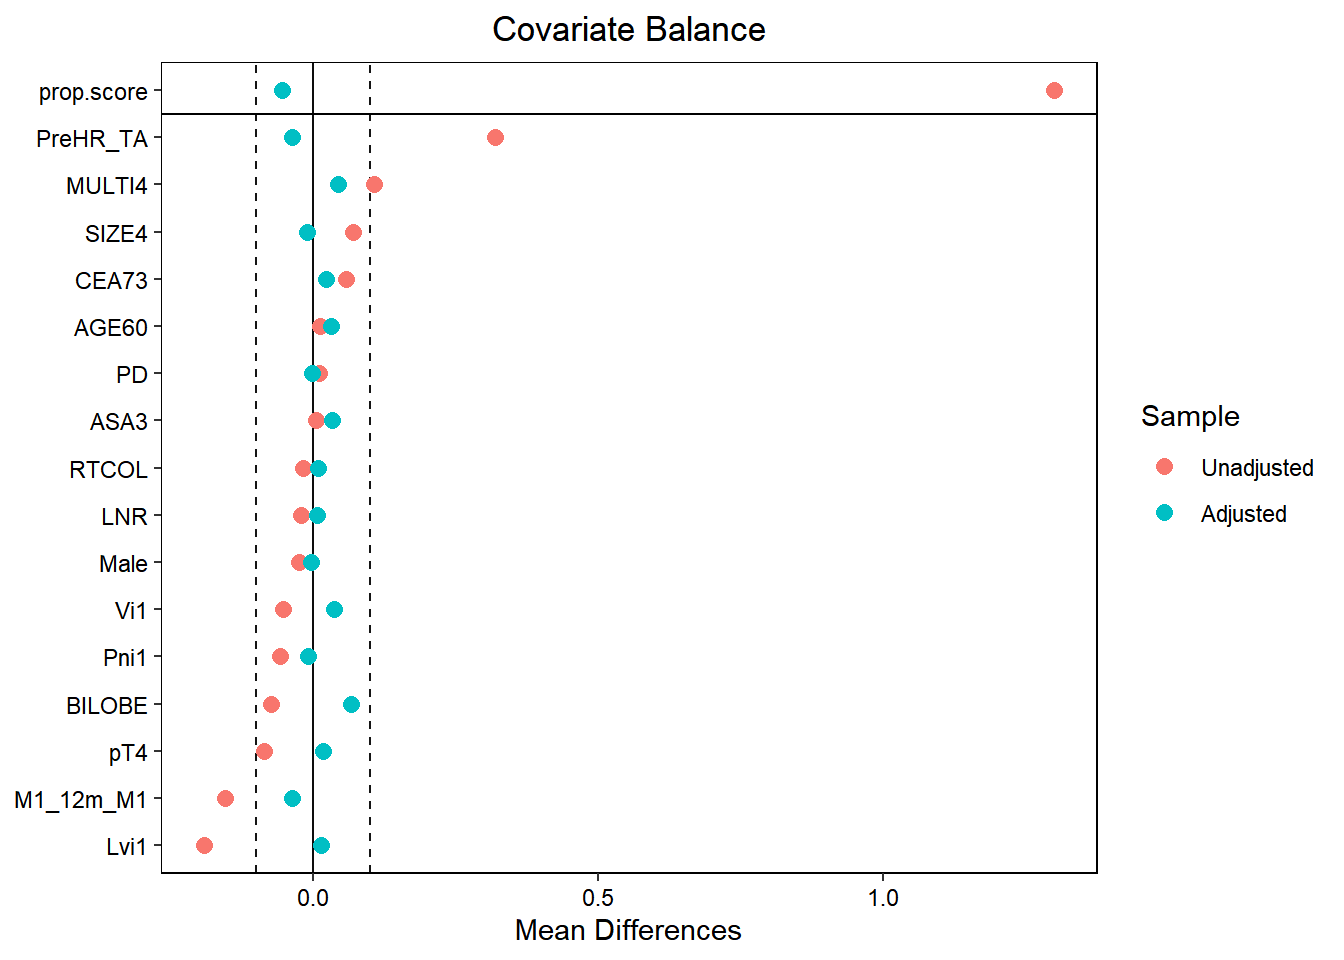

3.5.0.
ℹ Please use the `legend.position.inside` argument of `theme()` instead.

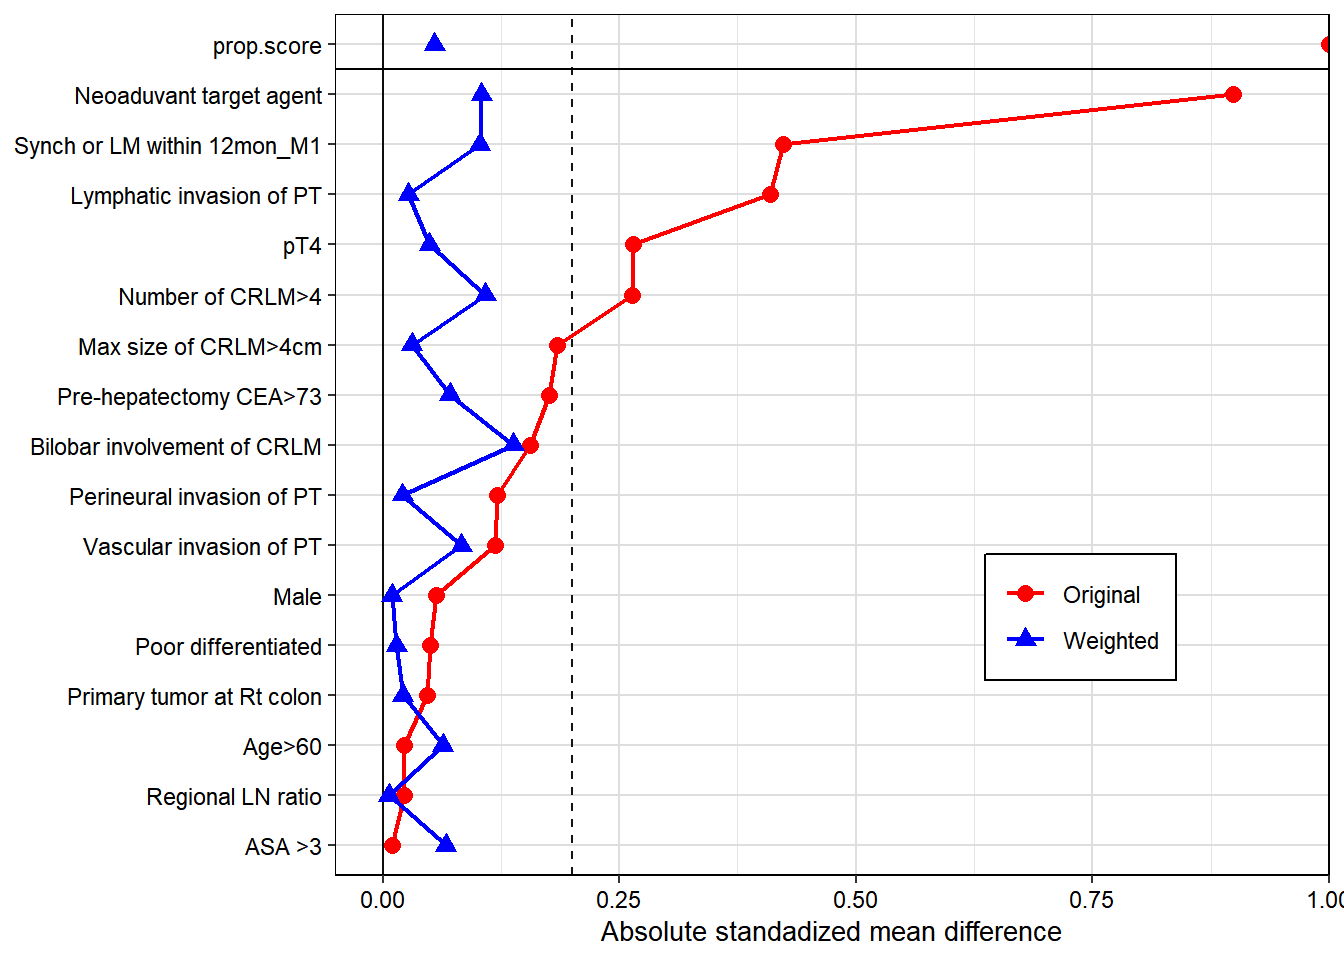

In [ ]:
love.plot(W.out_ate, thresholds = c(m = .1), var.order = "unadjusted")

Loading required package: grid

Loading required package: Matrix


Attaching package: 'survey'

The following object is masked from 'package:WeightIt':

    calibrate

The following object is masked from 'package:graphics':

    dotchart

(`geom_step()`).

(`geom_text()`).

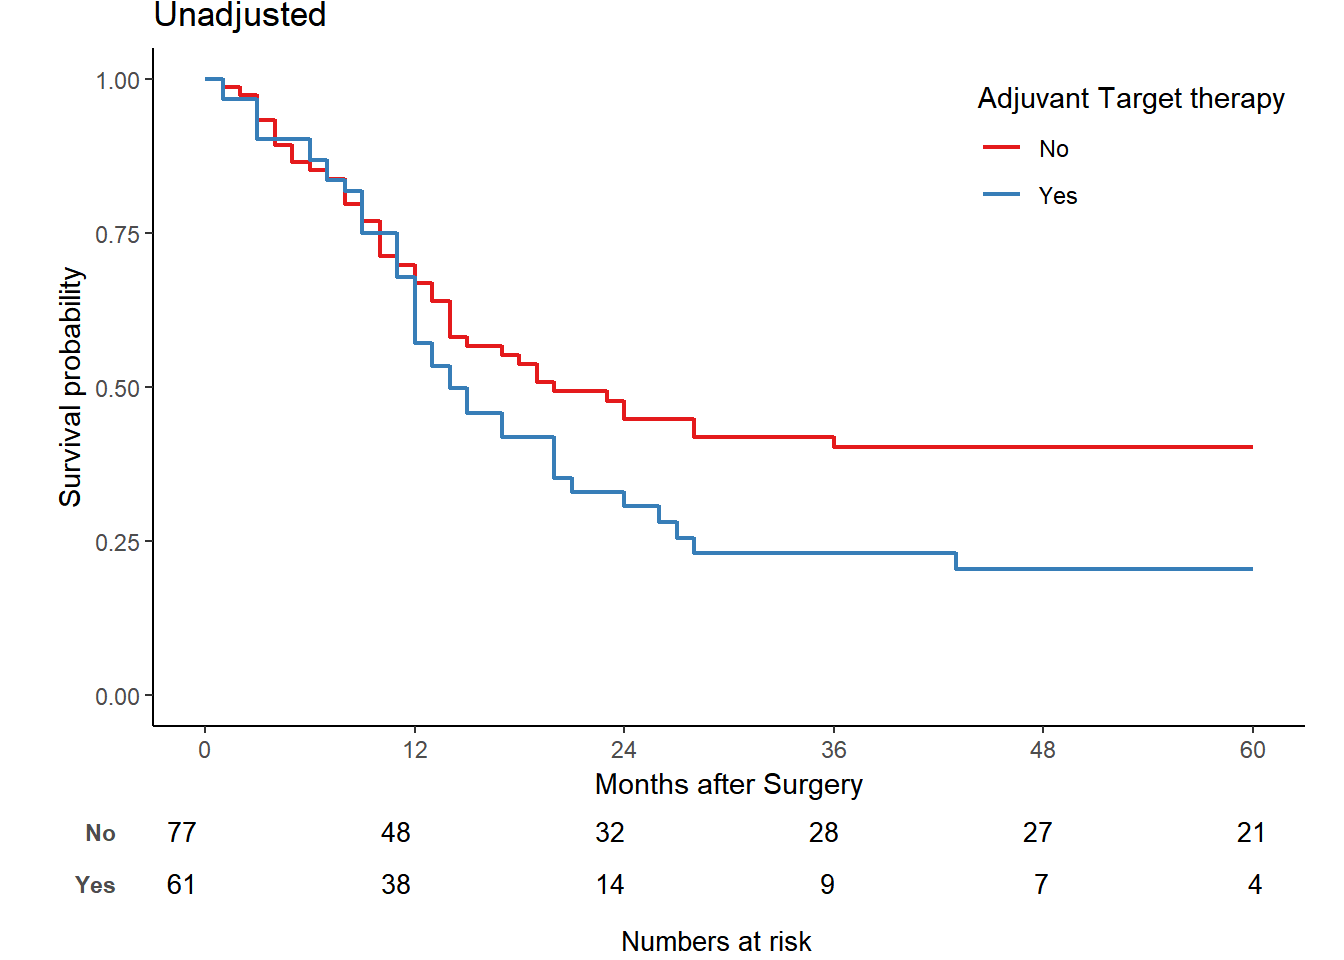

(`geom_step()`).
Removed 16 rows containing missing values or values outside the scale range
(`geom_text()`).

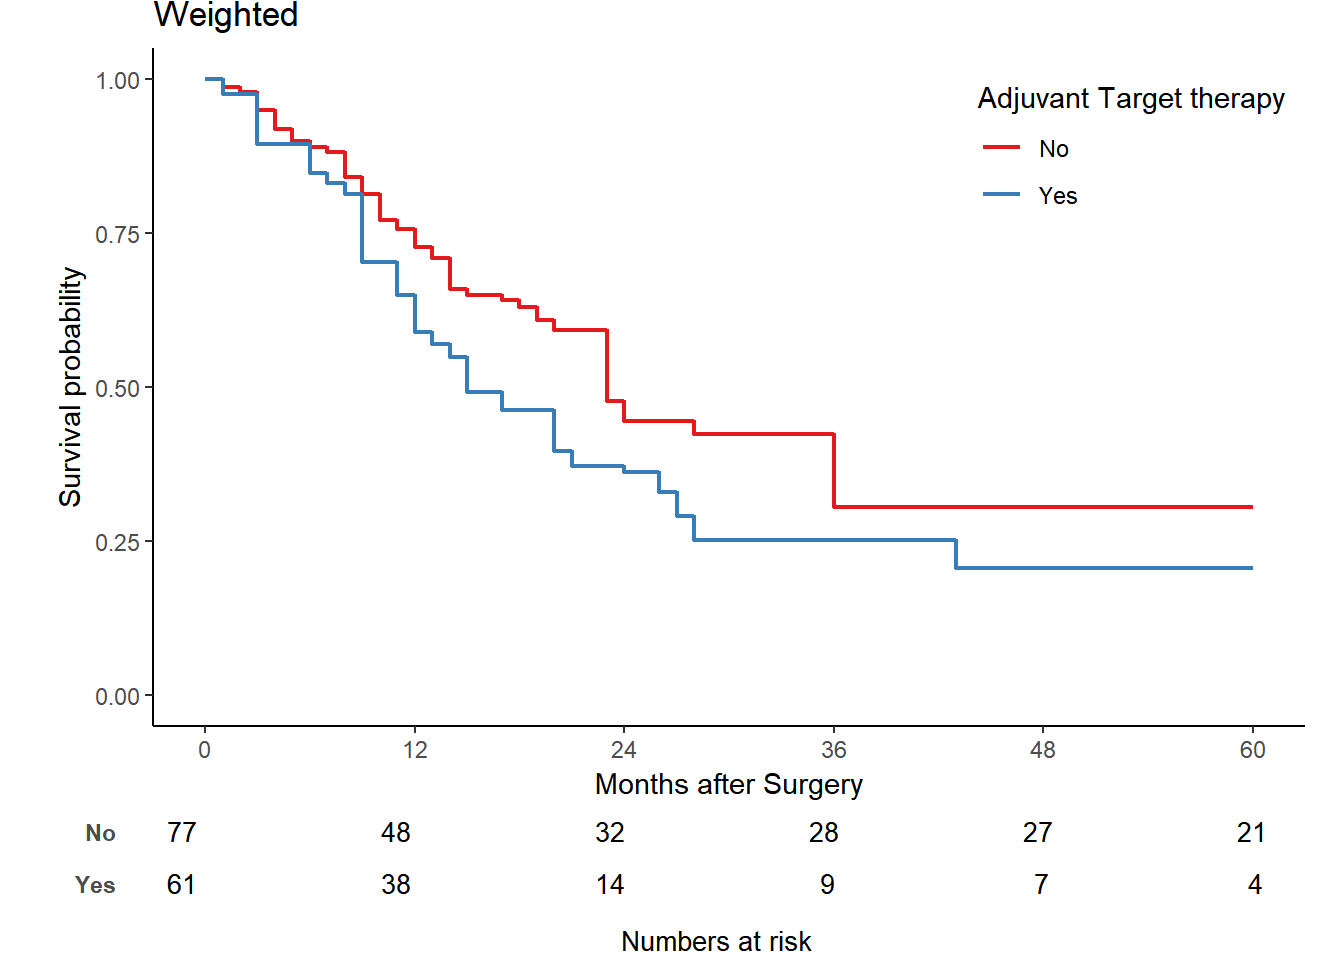

In [ ]:
library(tableone)
#install.packages("survey")
library(survey)

In [ ]:
#### Univarate Cox regression, unweighted, weighted ######################

HAN_IPTW$TS_DFS=Surv(HAN_IPTW$FU_DFS, HAN_IPTW$RECUR=="1") #time object

## Uni, unweighted
out = mycph(TS_DFS~Adju_TA+Adju_target+Male+AGE60+ASA3+RTCOL+LNR+pT4+Pni1+Lvi1+Vi1+PD+BILOBE+MULTI4+SIZE4+CEA73+M1_12m+PreHR_TA, digits=2, data=HAN_IPTW)
out
write.csv(out, file="Cox_uni.csv")


## Uni, weighted
# uni_ate = mycphwt(TS_DFS~Adju_TA+Adju_target+Male+AGE60+ASA3+RTCOL+LNR+pT4+Pni1+Lvi1+Vi1+PD+BILOBE+MULTI4+SIZE4+CEA73+M1_12m+PreHR_TA, digits=2, data=HAN_IPTW)
uni_ate = mycph(TS_DFS~Adju_TA+Adju_target+Male+AGE60+ASA3+RTCOL+LNR+pT4+Pni1+Lvi1+Vi1+PD+BILOBE+MULTI4+SIZE4+CEA73+M1_12m+PreHR_TA, digits=2, data=HAN_IPTW)
uni_ate
write.csv(uni_ate, file="Cox_uni_ate.csv")

##### Multivariate Cox regression, unweighted, weighted #################

## unweighted multi cox
COX<-coxph(TS_DFS~Adju_TA+Vi1+BILOBE+MULTI4+CEA73+PreHR_TA, data=HAN_IPTW)
COX<-coxph(TS_DFS~Adju_target+Vi1+BILOBE+MULTI4+CEA73+PreHR_TA, data=HAN_IPTW)
summary(COX)
extractHR(COX)

COX_step<-step(COX, direction="backward")
extractHR(COX_step, digit=2)

## weighted multi cox###
## ATE ###
multi_ate<-coxph(TS_DFS~Adju_TA+Male+LNR+Pni1+Vi1+BILOBE+MULTI4+CEA73, weights=ate.weights, data=HAN_IPTW)
multi_ate<-coxph(TS_DFS~Adju_target+Male+LNR+Pni1+Vi1+BILOBE+MULTI4+CEA73, weights=ate.weights, data=HAN_IPTW)
summary(multi_ate)
#원래코드에서는 extractHRwt 였으나 함수의 source 코드가 없어서 extractHR로 변경함 
#extractHRwt(multi_ate)
extractHR(multi_ate)

Wt_step<-step(multi_ate, direction="backward")
summary(Wt_step)

#t.step<-extractHRwt(Wt_step, digit=2)
t.step<-extractHR(Wt_step, digit=2)
t.step
write.csv(t.step, file="multi_Cox_wt.csv")

## 1 Introduction

Resectability가 있는 대장암의 간 전이에 대한 가장 효과적인 치료법은 전이부위를 포함하는 절제 수술과 perioperative chemotherapy으로 제시되고 있습니다. 하지만, 수술 후 재발률이 18개월 이내 75%까지 보고될 만큼 매우 높습니다 ([Penna and Nordlinger 2002](#ref-RN671)).

이에 항암화학요법에 표적 치료제를 추가하는 것에 대해 몇 몇 study가 보고되었으나 대규모의 높은 등급의 study는 아직 부족한 상태입니다. 이러한 study 에 따르면, 수술 후 표적치료제의 추가는 생존 이득이 없거나 오히려 유해한 결과로 나타났다고 보고되었습니다.

그러나 아직까지 국내 보험체계는 전이 부위를 포함하는 절제술 후 항암요법에 표적치료제를 추가하는 것에 제한이 없는 상황입니다.

따라서 대장암의 간 전이에서 근치적 절제술 후 항암화학요법을 진행한 환자에 대한 분석을 진행하여 표적치료제의 영향력을 평가하고자 하였습니다

## 2 Methods

### 2.1 Patients

본 연구는 후향적 연구로 2009년 1월부터 2022년 7월까지 원자력병원에서 시행한 대장암 간 전이에 대한 근치적 목적의 절제 수술 케이스를 대상으로 하였습니다.

이 중 FOLFOX FOLFIRI 등 Doublet chemotherapy를 시행한 케이스를 포함 하였으며, 타 장기 전이가 있거나, R1/2 절제의 경우, 항암치료를 받지 않거나 단일제제 항암치료 케이스는 제외하였습니다.

최종적으로 138개의 케이스에 대해 분석이 진행되었으며, Primary end point 는 간 전이 절제술로부터 progression free survival 로 설정하였습니다.

### 2.2 Statistical analyses

후향적 연구의 한계를 보정하기 위한 통계적 기법으로서 IPTW 를 적용하였습니다. 대상이 되는 138개의 original cohort 에 대해 다변량 로지스틱 회귀 분석을 통해 propensity score와 가중치 를 계산하여 가중치를 적용하여 보정한 데이터셋을 얻었습니다. 이렇게 보정된 weighted cohort 에 대해서 Absolute SMD 값을 통해 치료군과 대조군의 balance 를 확인하였습니다.

최종적으로 original cohort 와 weighted cohort 에서 콕스 회귀 분석을 시행하였으며 다변량 회귀분석에서는 후향 제거법을 사용하여 수술 후 표적치료제가 갖는 예후에의 영향력을 평가하였습니다.

Propensity score 를 구하기 위해 활용된 로지스틱 회귀분석에 적용된 변수는 다음과 같습니다. 환자 factor 로서 성별, 연령, ASA score 등 Primary tumor factor 로서 tumor location, lymph node ratio 등 Metastatic factor 로서 간엽 침범 정도, 전이 병변의 개수 등을 설정하였습니다. 이에 따라 Propensity score 에 따른 allocation probability 의 AUC 는 0.811, p-value 는 0.4906 로 나타났습니다 (<a href="#fig-ROC" class="quarto-xref">Figure 1</a>).

In [ ]:
ROC(form=Adju_TA~pr.score, data=HAN_IPTW, plot = "ROC")

All analyses were performed using R version 4.4.1 (R Core Team (2021). (R: A language and environment for statistical computing. R Foundation for Statistical Computing, Vienna, Austria).

## 3 Results

In [ ]:
table1


                    Descriptive Statistics by 'Adju_TA'                    
———————————————————————————————————————————————————————————————————————————— 
                           0                1              Total         p  
                         (N=77)           (N=61)          (N=138)     
———————————————————————————————————————————————————————————————————————————— 
 AGE                  59.0 ± 10.5      59.1 ±  9.0      59.1 ±  9.8    0.974
 Male                                                                  0.888
   - 0                 22 (28.6%)       19 (31.1%)       41 (29.7%)         
   - 1                 55 (71.4%)       42 (68.9%)       97 (70.3%)         
 Synch_M1                                                              0.121
   - M0                12 (15.6%)       17 (27.9%)       29 (21.0%)         
   - M1                65 (84.4%)       44 (72.1%)      109 (79.0%)         
 M1_12m                                                                0.025
   

Table 1은 연구에 포함된 환자 특성입니다. 138 개의 케이스에서 대조군의 크기는 77, 치료군의 크기는 61 명 이었습니다. 이 중, 표적치료제가 사용된 61명 중 베바시주맙이 42, 세툭시맙이 19명 이었습니다. 조사된 변수는 patient factor와 primary tumor factor, 그리고 metastases factor 로 구분하였습니다.

연령은 치료군과 대조군 모두 59세 전후로 나타났으며 연령 및 성별에 있어 두 군 간의 통계적인 차이는 없었습니다. 진단 당시 간 전이를 동반하였거나 원발 부위 종양 절제술 후 12개월 이내에 간전이가 발견된 경우는 대조군에서 빈도가 유의하게 높았습니다. 또한 간 절제술 전 항암화학요법 혹은 표적치료제를 사용한 경우는 치료군에서 빈도가 유의하게 높았습니다.

<figure>
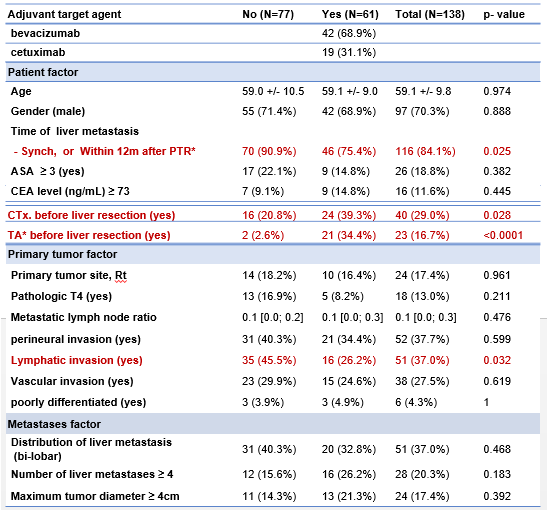
<figcaption aria-hidden="true">Table 1. Baseline characteristics for patients with targeted therapy after surgical resection of colorectal liver metastasis</figcaption>
</figure>

Primary tumor factor 에서는 pathology 소견 상 lymphatic invasion 을 보인 경우 대조군의 빈도가 유의하게 높았습니다. Metastases factor 에서는 병변의 양엽 침범 여부와 개수, 최대 직경에 대해 조사하였고 두 군 간의 유의한 차이는 없었습니다. 따라서 raw data에서는 치료군과 대조군 간의 불균형이 관찰됩니다.

따라서 propensity score를 사용해 가중치를 적용하여 데이터셋을 보정하는 IPTW 기법을 적용하였습니다.

Figure 2은, original cohort 와 weighted cohort 의 absolute SMD 를 나타낸 것으로 빨간색 범례가 보정 전 특성을 나타내고, 파란색 범례가 보정 후 특성을 나타냅니다. 가중치 적용 후 absolute SMD 값이 0.2 이하로 조정되어 보정 후 치료군과 대조군이 적절한 balance 를 이루고 있는 것을 확인할 수 있습니다.

<figure>
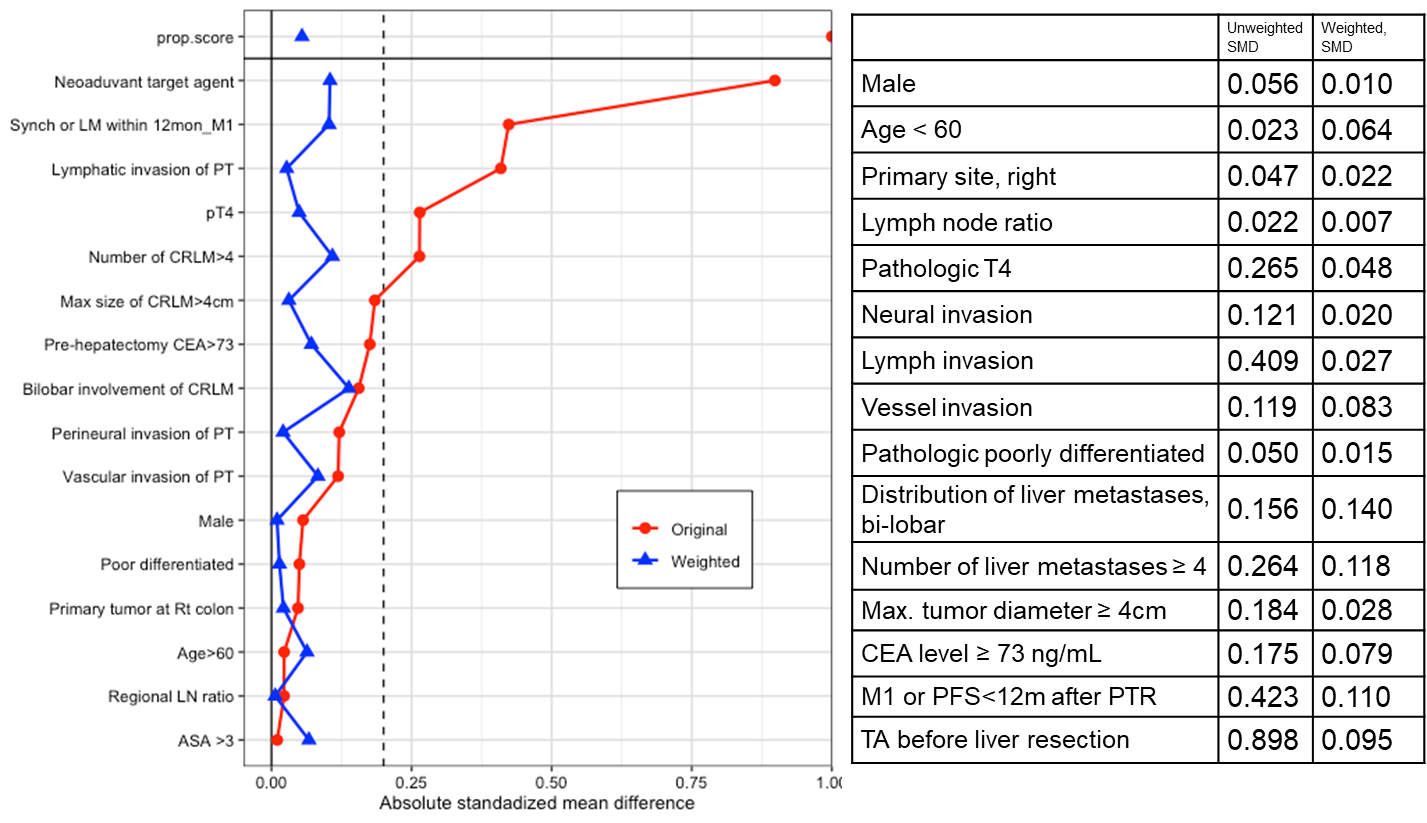
<figcaption aria-hidden="true">Figure 2. Absolute SMD, Balance at original cohort &amp; weighted cohort</figcaption>
</figure>

Figure 3은 연구에 포함된 환자 에 대한 Kaplan Meier 생존곡선입니다. 왼쪽은 metastases 에 대한 progression survival 을 나타내고 오른쪽은 overall survival 을 나타냅니다. f/u 기간의 중앙값은 45.5개월 이었으며, 관찰기간 중의 PFS event 는 85건, OS event 는 67건 이었습니다.

<figure>
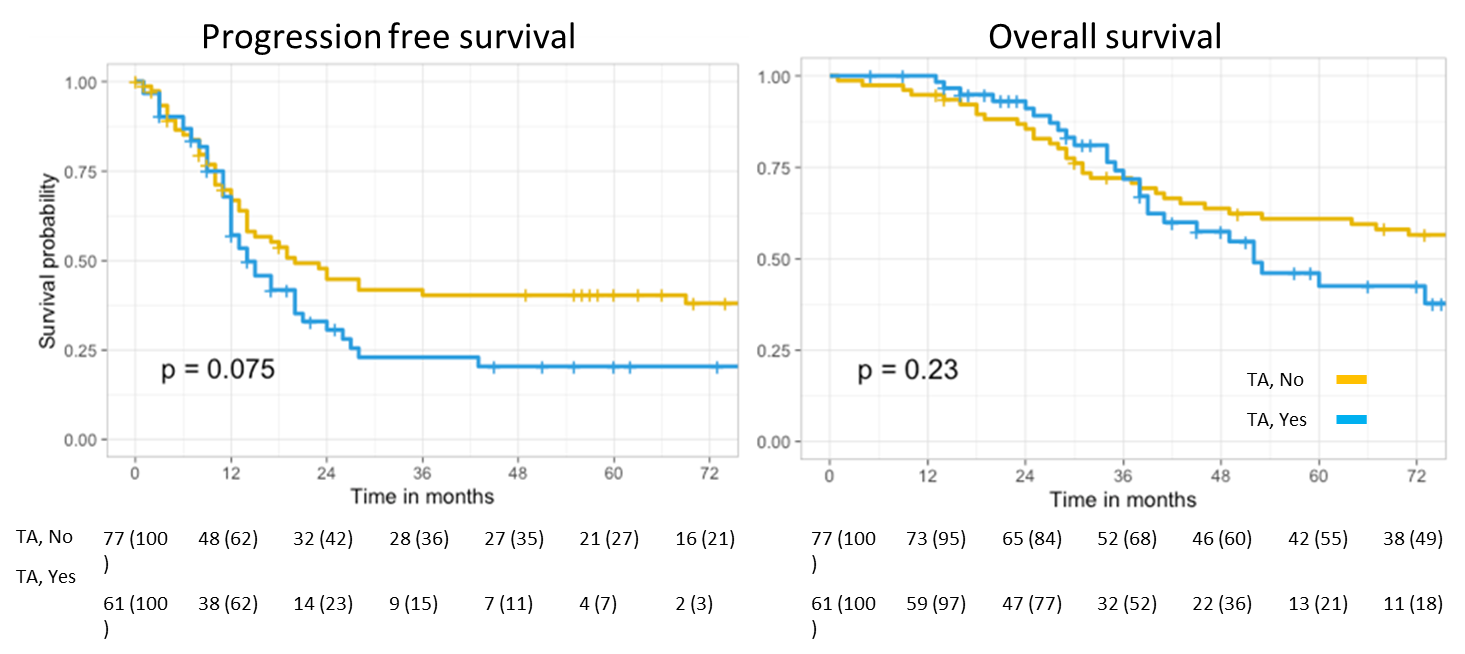
<figcaption aria-hidden="true">Figure 3. Kaplan Meier Analysis, original cohort</figcaption>
</figure>

테이블 2는 단변량 콕스 회귀 분석 결과입니다. 먼저 가중치를 적용하지 않은 original cohort 에서는 수술 전 CEA level 이 높은 경우, 수술 전 표적치료제 적용한 경우, vascular invasion 이 진행된 경우, 전이 병변이 간 양엽을 모두 침범한 경우, 간 전이 병변의 개수가 4개 이상일 경우에서 통계적으로 유의한 Poor prognostic factor 로 조사되었습니다.수술 후 표적치료제의 사용여부는 불량한 예후를 시사하는 경향을 보였으나 통계적으로 유의하지는 않았습니다.

Weighted cohort 에서는 보정 전 그룹과 비교하여 vascular invasion 이 있는 경우에서 Hazard ratio 1.70 으로 통계적으로 유의한 Poor prognostic factor 로 조사되었습니다. 보정 후에도 수술 후 표적치료제의 사용에 대한 경우는 불량한 예후를 시사하는 경향을 보였으나 통계적으로 유의하지는 않았습니다.

<figure>
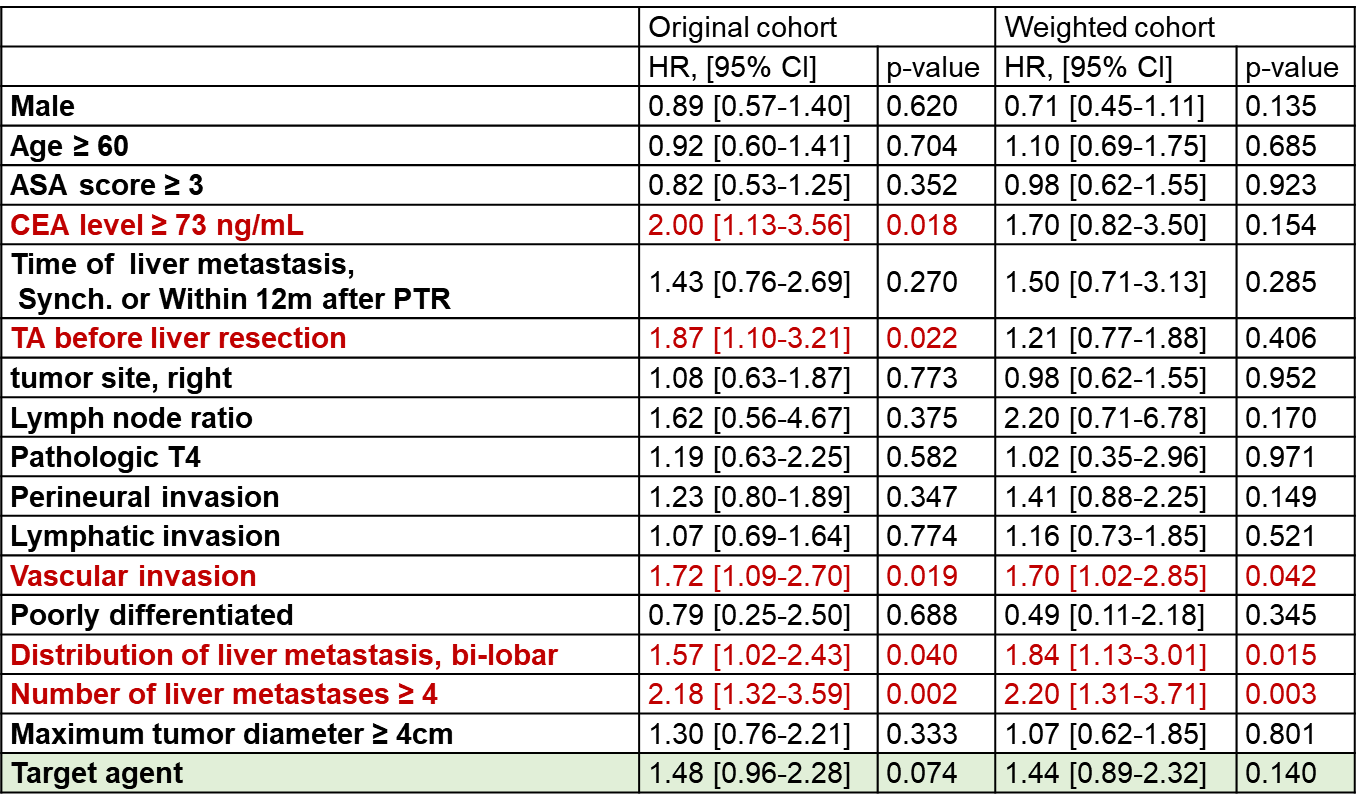
<figcaption aria-hidden="true">Table 2. Uni-variated Cox regression associated to PFS</figcaption>
</figure>

Table 3 는 다변량 콕스 회귀 분석 결과입니다. original cohort 에서는 간 전이 절제술 전 표적치료제를 사용한 경우, Vascular invasion 이 있는 경우, 전이 병변이 간 양엽을 모두 침범한 경우에서 통계적으로 유의한 Poor prognostic factor 로 조사되었습니다. 반면 Weighted cohort 에서는 Perineural invasion 여부와 더불어 수술 후 표적치료제의 사용이 유의한 poor prognostic factor 로 조사되었습니다.

<figure>
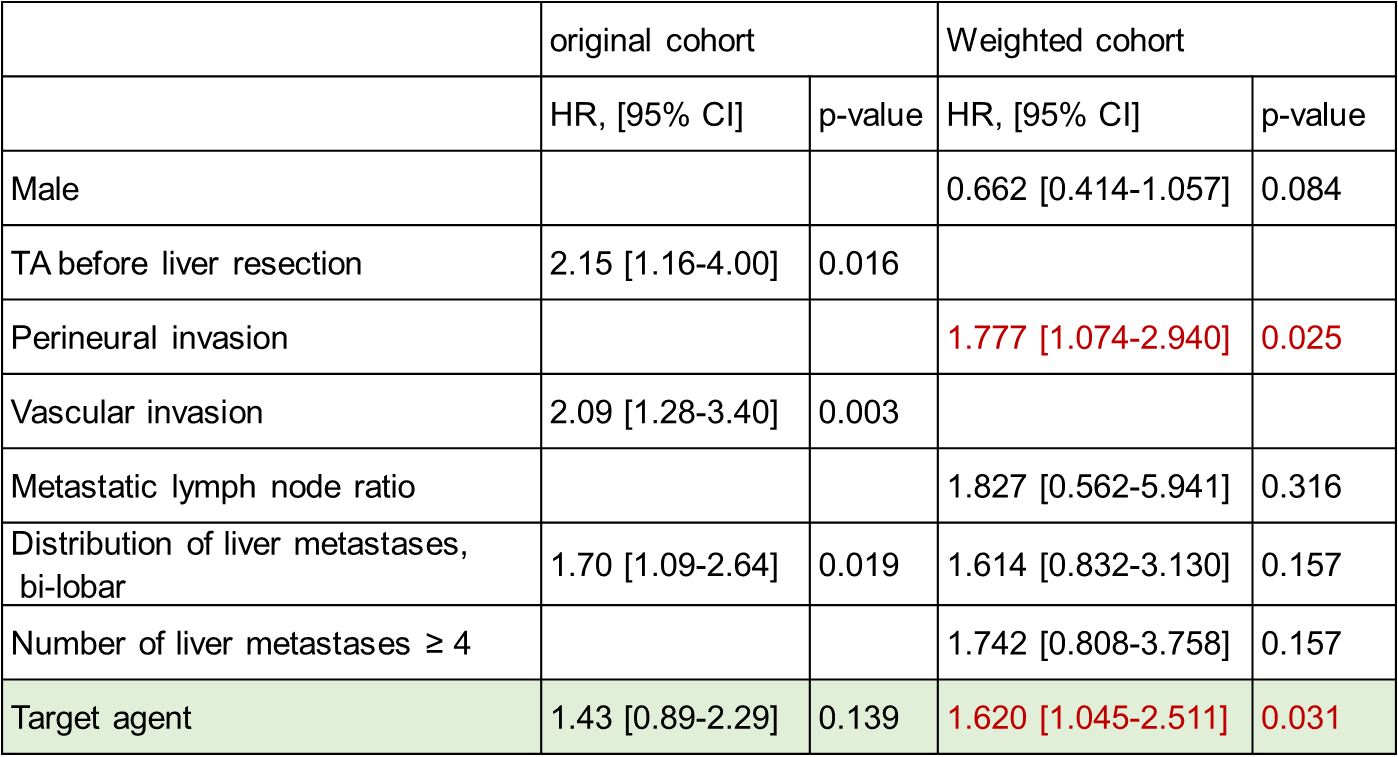
<figcaption aria-hidden="true">Table 3. multi-variated Cox regression associated to PFS</figcaption>
</figure>

## 4 Conclusion

결론적으로 대장암 환자의 간절제술 후 항암치료에 표적 치료제를 추가하는 것은 생존 이점이 없으며, 오히려, 전이절제술 후 표적 치료제 사용이 progression 에 있어 해로운 영향력이 있을 수 있음을 확인하였습니다.

## 5 Discussion

이러한 표적치료제의 사용이 해로울 수 있는 가능성은, 2014년 LANCET oncology 에 게재된 New EPOC study에서 언급된 내용으로, 이 분석 결과를 통해 해당 내용을 데이터로 확인할 수 있었습니다 ([Primrose et al. 2014](#ref-RN672)).

다만, 분석에 포함된 대상군의 크기가 제한적이었고, 실시된 표적치료제 별 분석이 이루어지지 않았습니다. 또한, 후향적 연구의 한계로서 unmeasured confounder 가 존재하여 분석의 한계가 있을 수 있겠습니다.

따라서 절제 가능한 대장암 환자에 대해 수술 후 최적의 표적 치료제 적용에 대한 대규모 전향적 연구가 필요할 것으로 사료됩니다.

Penna, C., and B. Nordlinger. 2002. “Colorectal Metastasis (Liver and Lung).” Journal Article. *Surg Clin North Am* 82 (5): 1075–90, x–xi. <https://doi.org/10.1016/s0039-6109(02)00051-8>.

Primrose, J., S. Falk, M. Finch-Jones, J. Valle, D. O’Reilly, A. Siriwardena, J. Hornbuckle, et al. 2014. “Systemic Chemotherapy with or Without Cetuximab in Patients with Resectable Colorectal Liver Metastasis: The New EPOC Randomised Controlled Trial.” Journal Article. *Lancet Oncol* 15 (6): 601–11. <https://doi.org/10.1016/s1470-2045(14)70105-6>.